In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import numpy as np
import open3d
from matplotlib import pyplot as plt
from scipy.spatial.transform import Rotation as R3D

## Prepare Scene

In [28]:
from pycamcal.simulation.cornell_box import create_cornell_box
from pycamcal.simulation.checkerboard import create_checkerboard_mesh

# create basic environment for some nice visual context
cornell_box = create_cornell_box(width=6, height=5)

# create calibration target
checkerboard = create_checkerboard_mesh(num_rows=7, num_cols=10, square_size=0.25)
checkerboard.translate(-checkerboard.get_center())
checkerboard.translate([0, 1, 1])
checkerboard.rotate(R3D.from_euler("x", 90, degrees=True).as_matrix())

scene = [*cornell_box.values(), checkerboard]
print(scene)

[TriangleMesh with 8 points and 2 triangles., TriangleMesh with 8 points and 2 triangles., TriangleMesh with 8 points and 2 triangles., TriangleMesh with 8 points and 2 triangles., TriangleMesh with 8 points and 2 triangles., TriangleMesh with 280 points and 140 triangles.]


In [29]:
# # preview scene setup
# world_axes = open3d.geometry.TriangleMesh.create_coordinate_frame()
# open3d.visualization.draw_geometries([*scene, world_axes], mesh_show_back_face=True)

## Prepare Camera

In [30]:
from pycamcal.camera_model import CameraModel
from pycamcal.camera_model import RadialTangentialDistortion

distortion = RadialTangentialDistortion(
    k1=-0.25,
    k2=0.0,
    k3=0.0,
    p1=0.0,
    p2=0.0
)

camera = CameraModel.from_fov(
    res_xy = (1200, 1000),
    fov_xy = (72, 60),
    distortion = distortion
)

print(camera)

## Render

Gauss-Newton Iterations:   0%|          | 0/5 [00:00<?, ?it/s]

max residual: 

Gauss-Newton Iterations:  20%|██        | 1/5 [00:01<00:05,  1.43s/it]

0.1240409
avg residual: 0.0
max residual: 

Gauss-Newton Iterations:  40%|████      | 2/5 [00:02<00:04,  1.37s/it]

0.124013305
avg residual: -5.086263e-10
max residual: 

Gauss-Newton Iterations:  60%|██████    | 3/5 [00:04<00:02,  1.32s/it]

0.12398726
avg residual: -2.0345052e-10
max residual: 

Gauss-Newton Iterations:  80%|████████  | 4/5 [00:05<00:01,  1.27s/it]

0.1239627
avg residual: -1.0172526e-10
max residual: 

Gauss-Newton Iterations: 100%|██████████| 5/5 [00:06<00:00,  1.28s/it]

0.123939455
avg residual: 0.0


(1000, 1200, 3)


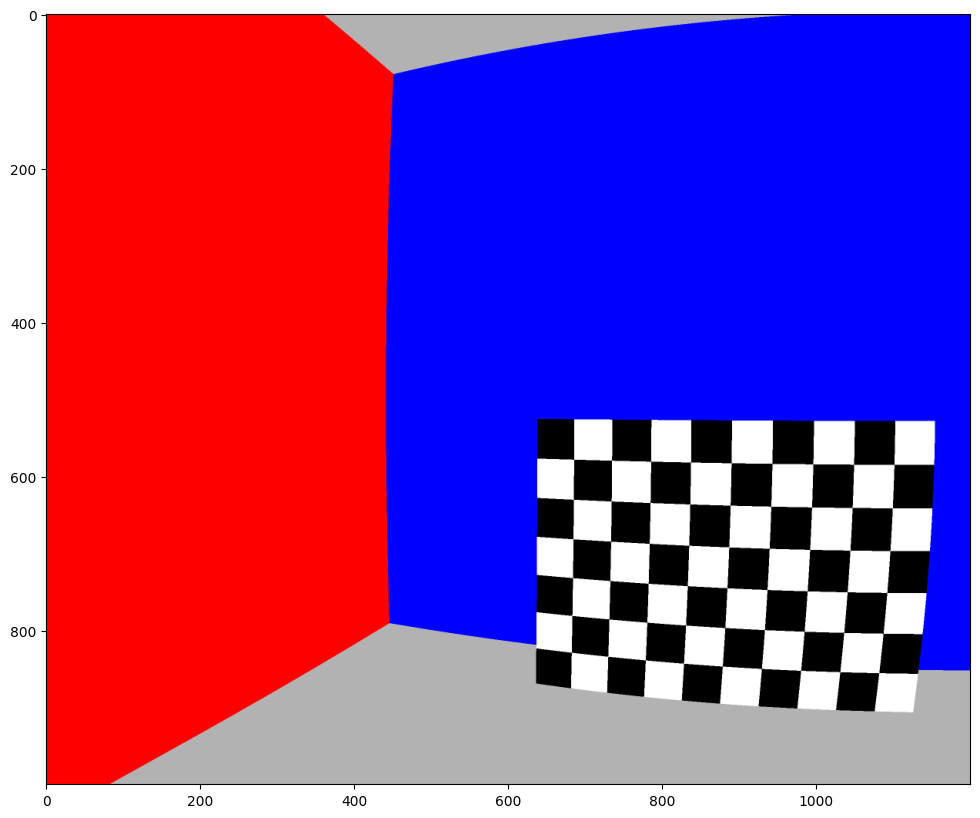

In [31]:
from pycamcal.primitives.pose import Pose3D
from pycamcal.simulation.raycasting import simulate_capture

camera_pose = Pose3D(
    np.array([0, -3.0, 2.0]),
    R3D.from_euler("xz", [-90, 20], degrees=True)
)

image = simulate_capture(scene, camera, camera_pose, rays_per_pixel=4)
print(image.shape)

fig, ax = plt.subplots(figsize=(12, 10))
ax.imshow(image)

{(0, 0): array([1081.7274,  855.3952], dtype=float32), (0, 1): array([1031.0847,  854.4028], dtype=float32), (0, 2): array([980.2761, 852.5021], dtype=float32), (0, 3): array([929.2813, 850.1405], dtype=float32), (0, 4): array([878.4958 , 847.09937], dtype=float32), (0, 5): array([828.14105, 843.30695], dtype=float32), (0, 6): array([778.4363 , 839.02985], dtype=float32), (0, 7): array([729.72546, 834.30194], dtype=float32), (0, 8): array([682.50586, 829.0961 ], dtype=float32), (1, 0): array([1087.2959 ,  804.37964], dtype=float32), (1, 1): array([1036.2904 ,  803.33075], dtype=float32), (1, 2): array([984.75024, 801.6651 ], dtype=float32), (1, 3): array([933.19293, 799.67816], dtype=float32), (1, 4): array([881.69727, 796.904  ], dtype=float32), (1, 5): array([830.72736, 793.6783 ], dtype=float32), (1, 6): array([780.4591 , 789.98584], dtype=float32), (1, 7): array([731.286  , 785.68494], dtype=float32), (1, 8): array([683.17444, 781.2645 ], dtype=float32), (2, 0): array([1092.1963,  

<Axes: >

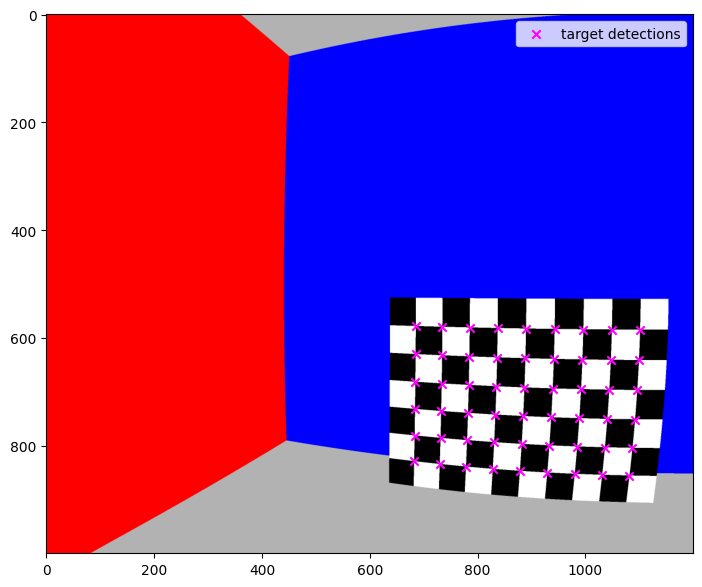

In [33]:
from pycamcal.calibration.target_detection.target_detection import detect_checkerboard_target
from pycamcal.calibration.target_detection.viz_utils import plot_target_detection

target_points = detect_checkerboard_target(image, nrows=7, ncols=10)
print(target_points)

fig, ax = plt.subplots(figsize=(9, 7))
plot_target_detection(image, target_points, ax=ax)